## Cleanning Data & DataViz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Documents/CleanDB3.csv', delimiter=';')
df.head()

,Project,FY,Quarter,Month,Main Category,Category_details,Main_Causes,Causes_details,Amount
0,ALNG,2010,Q3,August,Operations,Installations,PLANNING,1.2 Late delivery from suppliers/subcontractors,313.0
1,ALNG,2010,Q3,June,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1670.0
2,ALNG,2010,Q2,May,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1636.0
3,Block 15,2010,Q1,February,Project Management,Project Management,PLANNING,1.1 Late issue of AFC documentation,600.0
4,Block 15,2010,Q1,December,Fabrication,Fabrication,PLANNING,1.1 Late issue of AFC documentation,100.0


In [3]:
#Chaning the months to numbers 
mapping = {'January': 1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June': 6, 'July': 7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['MonthN']=df.Month.map(mapping)
df.columns

Index(['Project', 'FY', 'Quarter', 'Month', 'Main Category',
       'Category_details', 'Main_Causes', 'Causes_details', 'Amount',
       'MonthN'],
      dtype='object')

In [4]:
#Chaning the causes to numbers 
mapping2 = {'1.2 Late delivery from suppliers/subcontractors': 1,
'1.4 Ship Rescheduling/Reallocation : Change of vessel ' : 2,
'1.1 Late issue of AFC documentation':3,
'1.3 Late availability of ships extra costs':4,
'2.1 Incorrect estimate of cost in tender':5,
'2.2 Improper White Book Rates / Escalations':6,
'2.4 Incorrect estimate of allowances/contingencies':7,
'2.5 Improper Contract/Subcontract Flowdown':8,
'3.1 Materials and equipment delivered out-of specs':9,
'3.2 Incomplete or partial delivery':10,
'4.1 Incorrect design engineering':11,
'4.2 Incorrect installation engineering':12,
'4.3 Extra costs/staff cause by final docs delay':13,
'4.5 Incorrect execution offshore by Acergy':14,
'4.6 Incorrect execution offshore by 3rd party':15,
'4.7 Incorrect onshore local logistic':16,
'5. EQUIPMENT BREAKDOWN':17,
'5.1 Lack of preventive maintenance':18,
'5.2 Misuse of equipment':19}
df['CauseN']=df.Causes_details.map(mapping2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 11 columns):
Project             521 non-null object
FY                  521 non-null int64
Quarter             521 non-null object
Month               521 non-null object
Main Category       521 non-null object
Category_details    521 non-null object
Main_Causes         521 non-null object
Causes_details      521 non-null object
Amount              521 non-null float64
MonthN              521 non-null int64
CauseN              518 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 44.9+ KB


In [5]:
df = df.drop(columns = ['Quarter','Month', 'Main Category', 'Category_details', 'Main_Causes', 'Causes_details'])


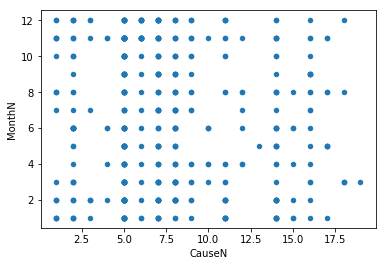

In [6]:
df.plot(kind='scatter', x='CauseN', y='MonthN')
plt.show()

In [7]:
data = df.groupby(['Project']).Amount.sum()
data

Project
ALNG                18401.000000
Block 15            49238.500000
Block 17            13906.000000
EGP3B                 500.000000
Epc2b                3088.000000
Greater Plutonio     1779.000000
Legend Metrology      214.000000
Moho Bilondo        24338.340000
Oso                   500.000000
Pazflor             31412.099999
Saxi                 4684.000000
USAN                    0.000000
Name: Amount, dtype: float64

In [8]:
#Normalize Results 
# df.loc[<row selection>, <column selection>]
#df.loc[df.A==0, 'B'] = df.loc[df.A==0, 'B'] / 2
df.loc[df.Project == 'ALNG', 'Amount'] = df.loc[df.Project == 'ALNG', 'Amount']/184
df.loc[df.Project == 'Block 15', 'Amount'] = df.loc[df.Project == 'Block 15', 'Amount']/492.38
df.loc[df.Project == 'Block 17', 'Amount'] = df.loc[df.Project == 'Block 17', 'Amount']/139
df.loc[df.Project == 'EGP3B', 'Amount'] = df.loc[df.Project == 'EGP3B', 'Amount']/5
df.loc[df.Project == 'Epc2b', 'Amount'] = df.loc[df.Project == 'Epc2b', 'Amount']/30.8
df.loc[df.Project == 'Greater Plutonio', 'Amount'] = df.loc[df.Project == 'Greater Plutonio', 'Amount']/178
df.loc[df.Project == 'Legend Metrology', 'Amount'] = df.loc[df.Project == 'Legend Metrology', 'Amount']/2.14
df.loc[df.Project == 'Moho Bilondo', 'Amount'] = df.loc[df.Project == 'Moho Bilondo', 'Amount']/243.4
df.loc[df.Project == 'Oso', 'Amount'] = df.loc[df.Project == 'Oso', 'Amount']/5
df.loc[df.Project == 'Pazflor', 'Amount'] = df.loc[df.Project == 'Pazflor', 'Amount']/314.12
df.loc[df.Project == 'Saxi', 'Amount'] = df.loc[df.Project == 'Saxi', 'Amount']/468.4
df

,Project,FY,Amount,MonthN,CauseN
0,ALNG,2010,1.701087,8,1.0
1,ALNG,2010,9.076087,6,2.0
2,ALNG,2010,8.891304,5,2.0
3,Block 15,2010,1.218571,2,3.0
4,Block 15,2010,0.203095,12,3.0
5,Block 15,2010,-0.203095,12,3.0
6,Block 15,2010,-0.507738,1,3.0
7,Block 15,2010,-0.507738,2,3.0
8,Block 15,2010,-1.218571,2,3.0
9,Block 15,2009,-3.046428,11,3.0


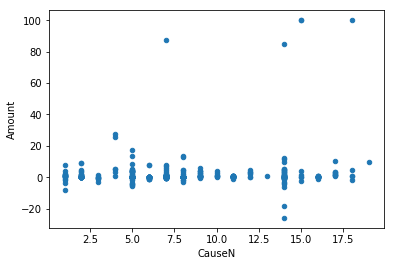

In [9]:
df.plot(kind='scatter', x='CauseN', y='Amount')
plt.show()

In [10]:
# df.loc[<row selection>, <column selection>]
out1 = df.loc[df.Amount > 80, :].sort_values(by=['Amount'], ascending=False)
out1

,Project,FY,Amount,MonthN,CauseN
480,EGP3B,2010,100.000000,8,15.0
481,Oso,2008,100.000000,1,15.0
517,Legend Metrology,2009,100.000000,8,18.0
236,Epc2b,2008,87.402597,8,7.0
436,Block 17,2010,84.661871,8,14.0


In [11]:
df.drop(df.index[[517,480,481,236,436]], inplace=True)


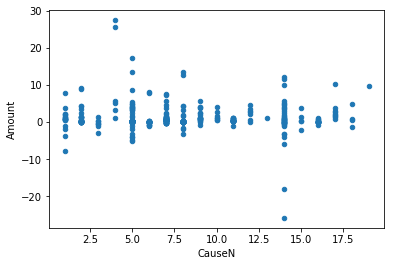

In [12]:
df.plot(kind='scatter', x='CauseN', y='Amount')


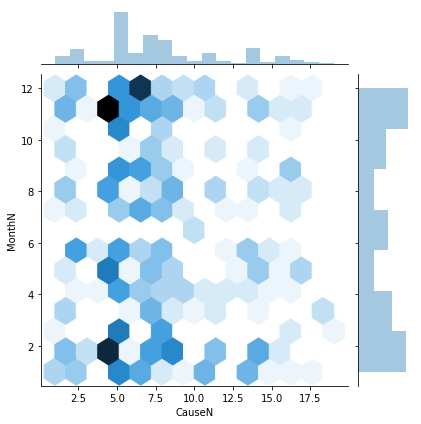

In [13]:
import seaborn as sns
sns.jointplot('CauseN','MonthN',df, kind='hex')

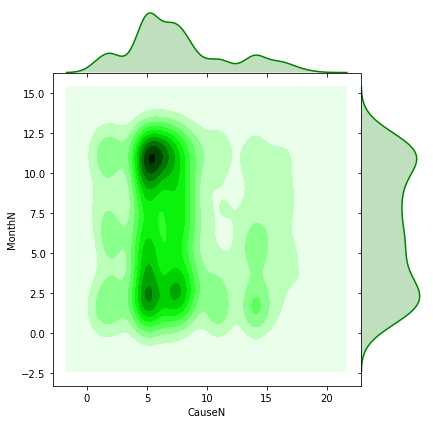

In [14]:
#From https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.jointplot('CauseN','MonthN',df, kind="kde", space=0, color="g")

nan 1.0
